In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
def plot_tags(df):
    plt.figure(figsize=(10, 8))
    
    df.Tag[df.Tag != 'O']\
        .value_counts()\
        .plot\
        .barh();
    
    plt.show()

In [8]:
def conll2003_load_files(filename):
    
    words, tags = [], []
    sent, labels = [], []

    with open(filename, encoding='utf-8') as f:
        for line in f:
            line = line.rstrip()
            if line:
                word, tag = line.split('\t')
                words.append(word)
                tags.append(tag)
            else:
                sent.append(words)
                labels.append(tags)
                words, tags = [], []
    
    dataframe_data = pd.DataFrame()
    
    for index, (words, tags) in enumerate(zip(sent, labels)):
        
        tmp_pandas = pd.DataFrame({
            "Sentence": ['Sentence #' + str(index)] * len(words),
            "Word": words,
            "Tag": tags
        })

        dataframe_data = dataframe_data.append(tmp_pandas)
    
    return dataframe_data

In [9]:
train = conll2003_load_files('conll2003/train.txt')
valid = conll2003_load_files('conll2003/valid.txt')
test = conll2003_load_files('conll2003/test.txt')

In [13]:
kaggle_ner_data = pd.read_csv('kaggle_ner.csv', encoding="latin1")
kaggle_ner_data = kaggle_ner_data.fillna(method = 'ffill')

kaggle_ner_data.Tag = kaggle_ner_data.Tag.apply(lambda x: x.upper())
kaggle_ner_data = kaggle_ner_data.rename(columns={"Sentence #": "Sentence"})

In [21]:
custom_ner_data = pd.read_csv('custom/DATA_ANNOTATED.csv')
last_custom_ner_data = pd.read_csv('custom/final_data_anotado.csv')

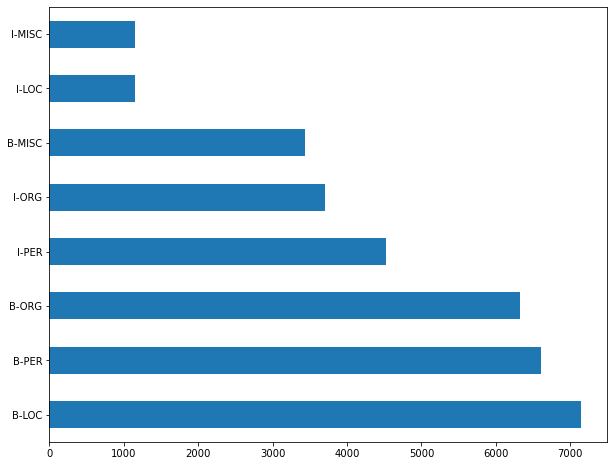

In [15]:
plot_tags(train)

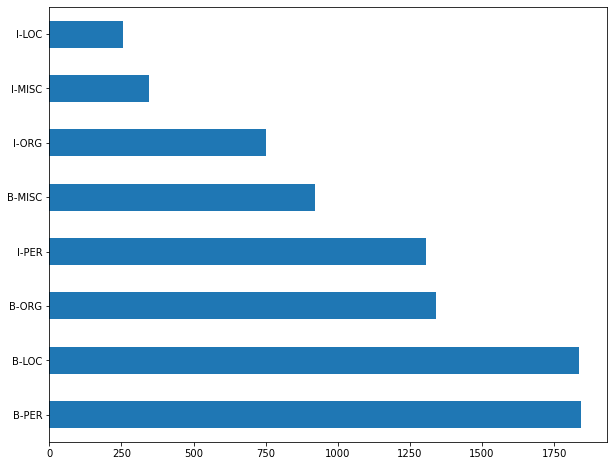

In [16]:
plot_tags(valid)

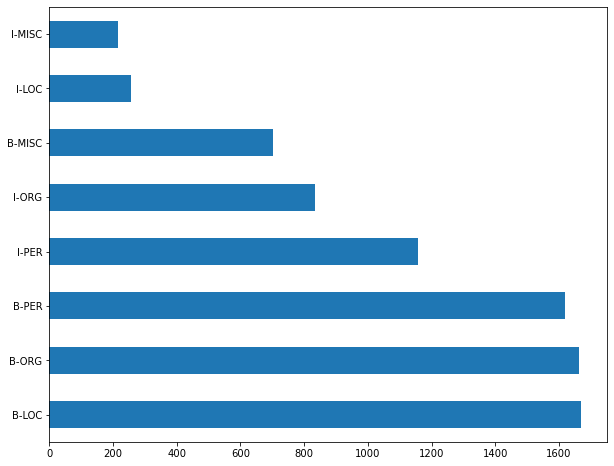

In [17]:
plot_tags(test)

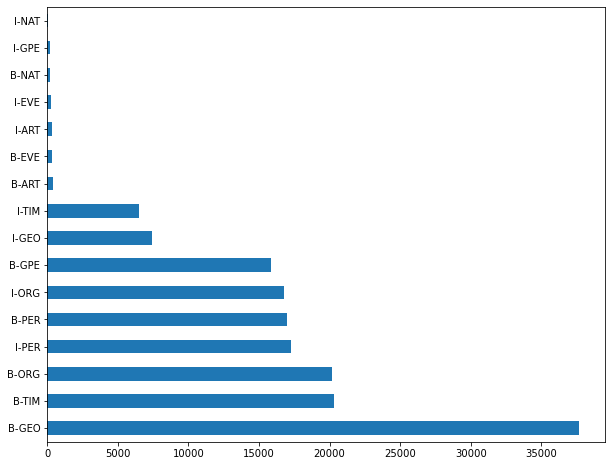

In [18]:
plot_tags(kaggle_ner_data)

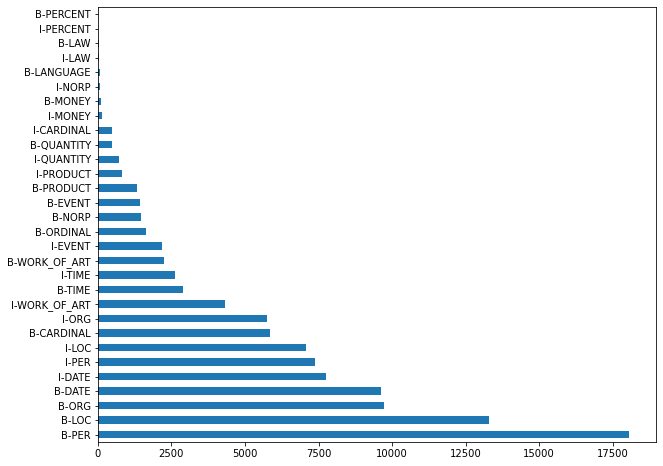

In [19]:
plot_tags(custom_ner_data)

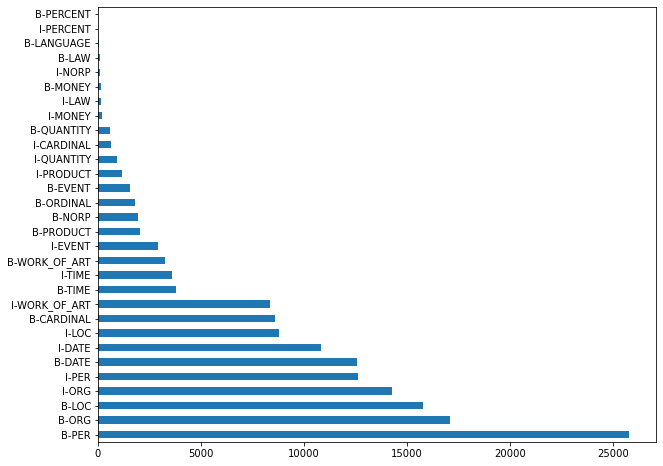

In [22]:
plot_tags(last_custom_ner_data)

In [20]:
train.to_csv('conll2003_csv/train.csv', index=None)
valid.to_csv('conll2003_csv/valid.csv', index=None)
test.to_csv('conll2003_csv/test.csv', index=None)